In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Resumes-Dataset-with-Labels.csv")

In [3]:
df

,File Name,Resume Text,Label
0,Peoplesoft Admin_AnubhavSingh.docx,Anubhav Kumar Singh\t\t\n\n To work in a gl...,Developer
1,Peoplesoft Admin_G Ananda Rayudu.doc,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,Developer
2,Peoplesoft Admin_Gangareddy.doc,PeopleSoft Database Administrator\r ...,Admin
3,Peoplesoft Admin_Murali.docx,Murali\n\nExperience Summary \n\nI have 6 year...,Developer
4,Peoplesoft Admin_Priyanka Ramadoss.doc,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",Developer
...,...,...,...
74,Sri Krishna S_Hexaware.doc,\tWorkday Integration Consultant\r\rName ...,Admin
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,Other
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,Manager
77,Venkateswarlu B_Hexaware.doc,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,Developer


In [4]:
df['File Name']

0         Peoplesoft Admin_AnubhavSingh.docx
1       Peoplesoft Admin_G Ananda Rayudu.doc
2            Peoplesoft Admin_Gangareddy.doc
3               Peoplesoft Admin_Murali.docx
4     Peoplesoft Admin_Priyanka Ramadoss.doc
                       ...                  
74                Sri Krishna S_Hexaware.doc
75                    Srikanth-Hexaware.docx
76                     SSKumar_Hexaware.docx
77              Venkateswarlu B_Hexaware.doc
78                 Vinay Kumar_Hexaware.docx
Name: File Name, Length: 79, dtype: object

In [5]:
df.head()

,File Name,Resume Text,Label
0,Peoplesoft Admin_AnubhavSingh.docx,Anubhav Kumar Singh\t\t\n\n To work in a gl...,Developer
1,Peoplesoft Admin_G Ananda Rayudu.doc,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,Developer
2,Peoplesoft Admin_Gangareddy.doc,PeopleSoft Database Administrator\r ...,Admin
3,Peoplesoft Admin_Murali.docx,Murali\n\nExperience Summary \n\nI have 6 year...,Developer
4,Peoplesoft Admin_Priyanka Ramadoss.doc,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",Developer


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   File Name    79 non-null     object
 1   Resume Text  79 non-null     object
 2   Label        79 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

File Name      0
Resume Text    0
Label          0
dtype: int64

In [9]:
df.describe()

,File Name,Resume Text,Label
count,79,79,79
unique,79,79,4
top,Peoplesoft Admin_AnubhavSingh.docx,Anubhav Kumar Singh\t\t\n\n To work in a gl...,Developer
freq,1,1,52


In [10]:
# Check unique values in the 'Resume Text' column
unique_values = df['Resume Text'].nunique()
print(f"Number of unique values in 'Resume Text': {unique_values}")

# Display a sample of the unique values
print(df['Resume Text'].unique()[:10])


Number of unique values in 'Resume Text': 79
['  Anubhav Kumar Singh\t\t\n\n  To work in a globally competitive environment on \n  challenging assignments that shall yield the \n  twin benefits of the job satisfaction and a steady-paced \n  professional growth.\n\n\n\n\n\n\n \n\n\n \n\n\n Professional Experience\n\n 06/2019 - Current\tHCL\t\t\t\t\t\t\t\t\t\t\n\t\t\tCurrent Role: System Admin Offshore\n\t\t\tSkills : Shell Scripting, Linux , PeopleSoft Administration , Github\n\nManaging PeopleSoft HCM and PeopleSoft FSCM production environments along with support environments installed on Linux and Windows OS.\nInvolved in Day to Day activities such as Project Migration, Database Refresh, System admin changes, Tax updates etc.\nTroubleshooting of various servers like application servers, Web Servers, Process Scheduler Servers.\nApplying Tuxedo and WebLogic Middleware CPU patches for various applications.\nWorking on shell scripting used as integration method for exchange of files to ex

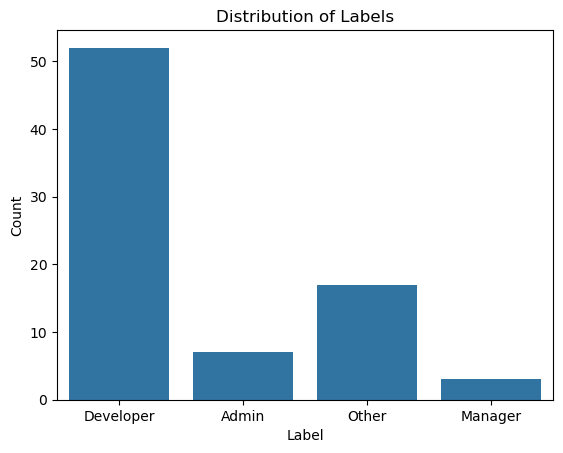

In [11]:
sns.countplot(x='Label', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


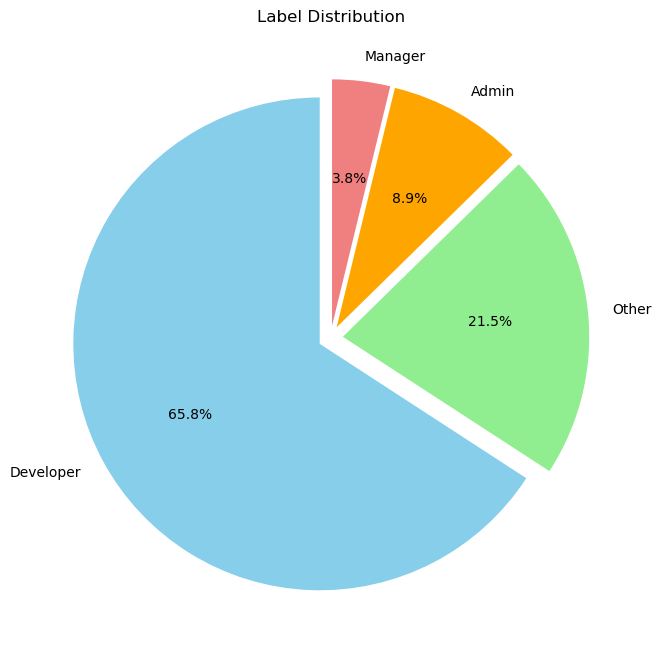

In [12]:
# Plot a pie chart for the Label distribution
plt.figure(figsize=(8,8))
df['Label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'orange', 'lightcoral'], explode=(0.05, 0.05, 0.05, 0.05))
plt.title('Label Distribution')
plt.ylabel('')  # Hide the ylabel
plt.show()


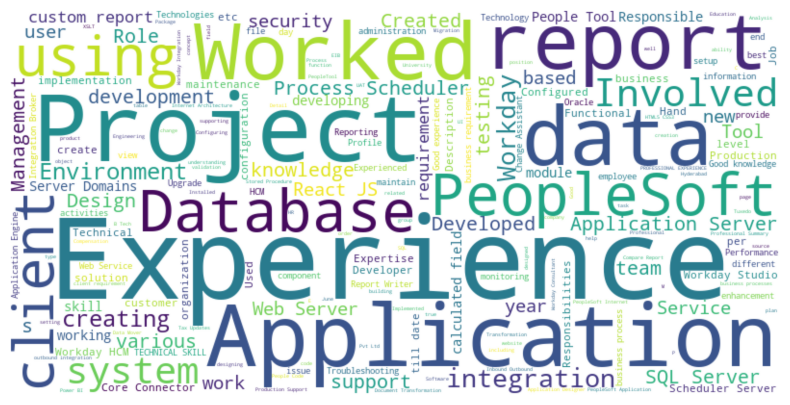

In [13]:
from wordcloud import WordCloud
text=' '.join(df['Resume Text'].astype(str))

word_cloud=WordCloud(width=800,height=400,background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(word_cloud,interpolation='gaussian')
plt.axis('off')
plt.show()

In [14]:
#tokenization
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [15]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
def text_clean_nltk(text):
    text=text.lower()
    text=re.sub(r'\s+','',text).strip()
    text=re.sub(r'[^\w\s]','',text)
    tokens = word_tokenize(text)
    stop_words=set(stopwords.words('english'))
    lemmatizer=WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    Resume_content = ' '.join(tokens)
    return Resume_content
df['Cleaned_Tokens'] = df['Resume Text'].apply(text_clean_nltk)

In [17]:
print(df['Cleaned_Tokens'].head())

0    anubhavkumarsinghtoworkinagloballycompetitivee...
1    profilesummary7yearsofexperienceinimplementing...
2    peoplesoftdatabaseadministratorgangareddyprofe...
3    muraliexperiencesummaryihave6yearsofexperience...
4    priyankaramadoss6146mountpleasantcoonoorthenil...
Name: Cleaned_Tokens, dtype: object


In [18]:
# Create a list of token lists
tokenized_docs = df['Cleaned_Tokens'].apply(lambda x: x.split()).tolist()

In [19]:
df

,File Name,Resume Text,Label,Cleaned_Tokens
0,Peoplesoft Admin_AnubhavSingh.docx,Anubhav Kumar Singh\t\t\n\n To work in a gl...,Developer,anubhavkumarsinghtoworkinagloballycompetitivee...
1,Peoplesoft Admin_G Ananda Rayudu.doc,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,Developer,profilesummary7yearsofexperienceinimplementing...
2,Peoplesoft Admin_Gangareddy.doc,PeopleSoft Database Administrator\r ...,Admin,peoplesoftdatabaseadministratorgangareddyprofe...
3,Peoplesoft Admin_Murali.docx,Murali\n\nExperience Summary \n\nI have 6 year...,Developer,muraliexperiencesummaryihave6yearsofexperience...
4,Peoplesoft Admin_Priyanka Ramadoss.doc,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",Developer,priyankaramadoss6146mountpleasantcoonoorthenil...
...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,\tWorkday Integration Consultant\r\rName ...,Admin,workdayintegrationconsultantnamesrikrishnaspro...
75,Srikanth-Hexaware.docx,Seeking suitable positions in Workday HCM as ...,Other,seekingsuitablepositionsinworkdayhcmastechnofu...
76,SSKumar_Hexaware.docx,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,Manager,workdayhcmfcmnamekumarssroleworkdayconsultantp...
77,Venkateswarlu B_Hexaware.doc,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,Developer,venkateswarlubworkdayconsultanthaving53yearsof...


In [20]:
df.drop(columns=['Resume Text'],inplace=True)

#model building

In [21]:
df

,File Name,Label,Cleaned_Tokens
0,Peoplesoft Admin_AnubhavSingh.docx,Developer,anubhavkumarsinghtoworkinagloballycompetitivee...
1,Peoplesoft Admin_G Ananda Rayudu.doc,Developer,profilesummary7yearsofexperienceinimplementing...
2,Peoplesoft Admin_Gangareddy.doc,Admin,peoplesoftdatabaseadministratorgangareddyprofe...
3,Peoplesoft Admin_Murali.docx,Developer,muraliexperiencesummaryihave6yearsofexperience...
4,Peoplesoft Admin_Priyanka Ramadoss.doc,Developer,priyankaramadoss6146mountpleasantcoonoorthenil...
...,...,...,...
74,Sri Krishna S_Hexaware.doc,Admin,workdayintegrationconsultantnamesrikrishnaspro...
75,Srikanth-Hexaware.docx,Other,seekingsuitablepositionsinworkdayhcmastechnofu...
76,SSKumar_Hexaware.docx,Manager,workdayhcmfcmnamekumarssroleworkdayconsultantp...
77,Venkateswarlu B_Hexaware.doc,Developer,venkateswarlubworkdayconsultanthaving53yearsof...


In [22]:
df_in=df.copy()

In [23]:
# List of keywords to count
#keywords = ['developer', 'admin', 'manager', 'peoplesoft', 'workday']
keywords = ['developer', 'admin', 'manager', 'other']

# Create keyword count features
for keyword in keywords:
    df_in[f'count_{keyword}'] = df_in['Cleaned_Tokens'].str.lower().str.count(keyword)


In [24]:
df_in

,File Name,Label,Cleaned_Tokens,count_developer,count_admin,count_manager,count_other
0,Peoplesoft Admin_AnubhavSingh.docx,Developer,anubhavkumarsinghtoworkinagloballycompetitivee...,1,12,2,1
1,Peoplesoft Admin_G Ananda Rayudu.doc,Developer,profilesummary7yearsofexperienceinimplementing...,2,5,2,0
2,Peoplesoft Admin_Gangareddy.doc,Admin,peoplesoftdatabaseadministratorgangareddyprofe...,0,13,3,1
3,Peoplesoft Admin_Murali.docx,Developer,muraliexperiencesummaryihave6yearsofexperience...,1,1,0,1
4,Peoplesoft Admin_Priyanka Ramadoss.doc,Developer,priyankaramadoss6146mountpleasantcoonoorthenil...,2,5,3,0
...,...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,Admin,workdayintegrationconsultantnamesrikrishnaspro...,0,1,0,0
75,Srikanth-Hexaware.docx,Other,seekingsuitablepositionsinworkdayhcmastechnofu...,0,0,0,0
76,SSKumar_Hexaware.docx,Manager,workdayhcmfcmnamekumarssroleworkdayconsultantp...,0,0,1,1
77,Venkateswarlu B_Hexaware.doc,Developer,venkateswarlubworkdayconsultanthaving53yearsof...,1,0,0,2


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df_in['Cleaned_Tokens'])

# Convert TF-IDF matrix to DataFrame and combine with keyword counts
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
X = pd.concat([df_in.reset_index(drop=True), tfidf_df], axis=1)


In [26]:
df_in

,File Name,Label,Cleaned_Tokens,count_developer,count_admin,count_manager,count_other
0,Peoplesoft Admin_AnubhavSingh.docx,Developer,anubhavkumarsinghtoworkinagloballycompetitivee...,1,12,2,1
1,Peoplesoft Admin_G Ananda Rayudu.doc,Developer,profilesummary7yearsofexperienceinimplementing...,2,5,2,0
2,Peoplesoft Admin_Gangareddy.doc,Admin,peoplesoftdatabaseadministratorgangareddyprofe...,0,13,3,1
3,Peoplesoft Admin_Murali.docx,Developer,muraliexperiencesummaryihave6yearsofexperience...,1,1,0,1
4,Peoplesoft Admin_Priyanka Ramadoss.doc,Developer,priyankaramadoss6146mountpleasantcoonoorthenil...,2,5,3,0
...,...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,Admin,workdayintegrationconsultantnamesrikrishnaspro...,0,1,0,0
75,Srikanth-Hexaware.docx,Other,seekingsuitablepositionsinworkdayhcmastechnofu...,0,0,0,0
76,SSKumar_Hexaware.docx,Manager,workdayhcmfcmnamekumarssroleworkdayconsultantp...,0,0,1,1
77,Venkateswarlu B_Hexaware.doc,Developer,venkateswarlubworkdayconsultanthaving53yearsof...,1,0,0,2


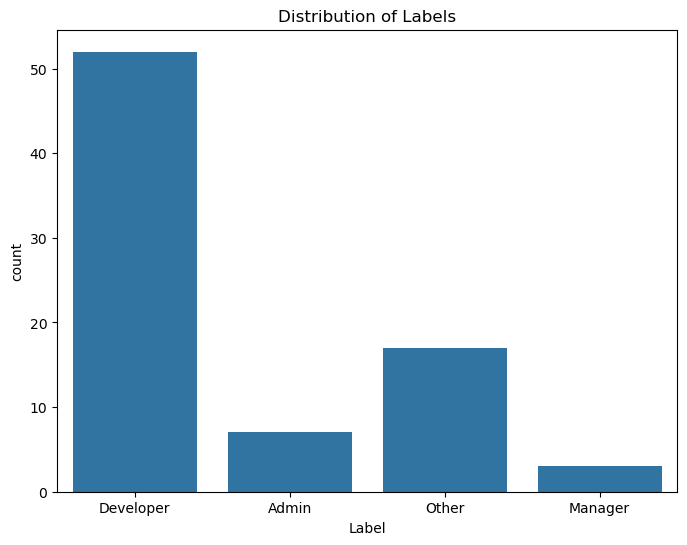

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the Label column
plt.figure(figsize=(8,6))
sns.countplot(x='Label', data=df_in)
plt.title('Distribution of Labels')
plt.show()


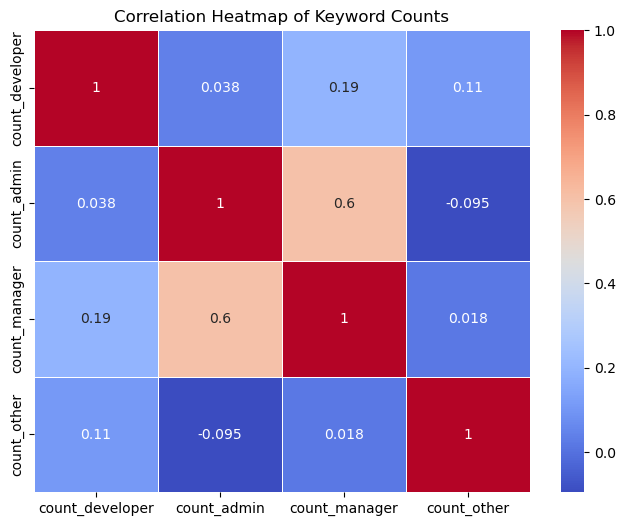

In [28]:
# Select the keyword count columns
keyword_counts = df_in[['count_developer', 'count_admin', 'count_manager', 'count_other']]

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(keyword_counts.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Keyword Counts')
plt.show()


<Figure size 1000x600 with 0 Axes>

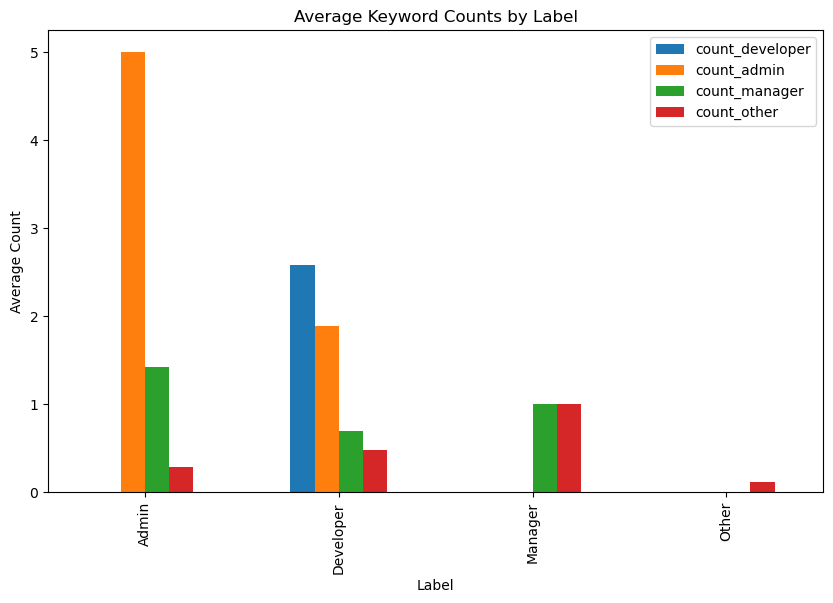

In [29]:
# Plot the average keyword counts by Label
plt.figure(figsize=(10,6))
keyword_means = df_in.groupby('Label')[['count_developer', 'count_admin', 'count_manager', 'count_other']].mean()
keyword_means.plot(kind='bar', stacked=False, figsize=(10,6))
plt.title('Average Keyword Counts by Label')
plt.ylabel('Average Count')
plt.show()


In [30]:
df_in['Label'].value_counts()

Label
Developer    52
Other        17
Admin         7
Manager       3
Name: count, dtype: int64

In [31]:
df_in

,File Name,Label,Cleaned_Tokens,count_developer,count_admin,count_manager,count_other
0,Peoplesoft Admin_AnubhavSingh.docx,Developer,anubhavkumarsinghtoworkinagloballycompetitivee...,1,12,2,1
1,Peoplesoft Admin_G Ananda Rayudu.doc,Developer,profilesummary7yearsofexperienceinimplementing...,2,5,2,0
2,Peoplesoft Admin_Gangareddy.doc,Admin,peoplesoftdatabaseadministratorgangareddyprofe...,0,13,3,1
3,Peoplesoft Admin_Murali.docx,Developer,muraliexperiencesummaryihave6yearsofexperience...,1,1,0,1
4,Peoplesoft Admin_Priyanka Ramadoss.doc,Developer,priyankaramadoss6146mountpleasantcoonoorthenil...,2,5,3,0
...,...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,Admin,workdayintegrationconsultantnamesrikrishnaspro...,0,1,0,0
75,Srikanth-Hexaware.docx,Other,seekingsuitablepositionsinworkdayhcmastechnofu...,0,0,0,0
76,SSKumar_Hexaware.docx,Manager,workdayhcmfcmnamekumarssroleworkdayconsultantp...,0,0,1,1
77,Venkateswarlu B_Hexaware.doc,Developer,venkateswarlubworkdayconsultanthaving53yearsof...,1,0,0,2


import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Drop non-numeric columns (if they exist)
#df_in = df_in.drop(columns=['Cleaned_Tokens'], errors='ignore')

# Prepare your features and labels
X = df_in.drop(columns=['Label','Cleaned_Tokens',])  # Drop 'Label' here
Y = df_in['Label']

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check data types and for null values
#print("Data types in X_train:")
#print(X_train.dtypes)
#print("Null values in X_train:", X_train.isnull().sum().sum())

# Ensure all columns are numeric
X_train = X_train.select_dtypes(exclude=['object'])

# Step 1: Train a Logistic Regression Model
model_lg = LogisticRegression()  # Increase max_iter if necessary
model_lg.fit(X_train, Y_train)

# Step 2: Make predictions
y_pred_train_lg = model_lg.predict(X_train)

# Calculate accuracy
accuracy_train_lg = accuracy_score(Y_train, y_pred_train_lg)
print("Accuracy on training set:", accuracy_train_lg)

# Step 3: Evaluate the model
print(classification_report(Y_train, y_pred_train_lg, zero_division=1))


In [32]:
from sklearn.model_selection import train_test_split
# Drop the non-numeric columns (keep only the features)
X = X.drop(columns=['Label','Cleaned_Tokens','File Name'])

# Prepare your labels
Y= df_in['Label']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(63, 81)
(16, 81)
(63,)
(16,)


In [34]:
df_in['Cleaned_Tokens'].isnull().sum()

0

<h1>Logistic Regression</h1>

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve
from sklearn.metrics import accuracy_score

# Step 1: Train a Logistic Regression Model
model_lg= LogisticRegression()
model_lg.fit(X_train, Y_train)

# Step 2: Make predictions
y_pred_train_lg=model_lg.predict(X_train)

accuracy_train_lg = accuracy_score(Y_train, y_pred_train_lg)
print("Accuracy on test set:", accuracy_train_lg)

# Step 3: Evaluate the model, using zero_division=1 to handle undefined precision
print(classification_report(Y_train, y_pred_train_lg, zero_division=1))


Accuracy on test set: 1.0
              precision    recall  f1-score   support

       Admin       1.00      1.00      1.00         7
   Developer       1.00      1.00      1.00        39
     Manager       1.00      1.00      1.00         2
       Other       1.00      1.00      1.00        15

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [36]:
# Step 2: Make predictions
y_pred_test_lg=model_lg.predict(X_test)

accuracy_test_lg = accuracy_score(Y_test, y_pred_test_lg)
print("Accuracy on test set:", accuracy_test_lg)

# Step 3: Evaluate the model, using zero_division=1 to handle undefined precision
print(classification_report(Y_test, y_pred_test_lg, zero_division=1))

Accuracy on test set: 0.9375
              precision    recall  f1-score   support

   Developer       1.00      1.00      1.00        13
     Manager       1.00      0.00      0.00         1
       Other       0.67      1.00      0.80         2

    accuracy                           0.94        16
   macro avg       0.89      0.67      0.60        16
weighted avg       0.96      0.94      0.91        16



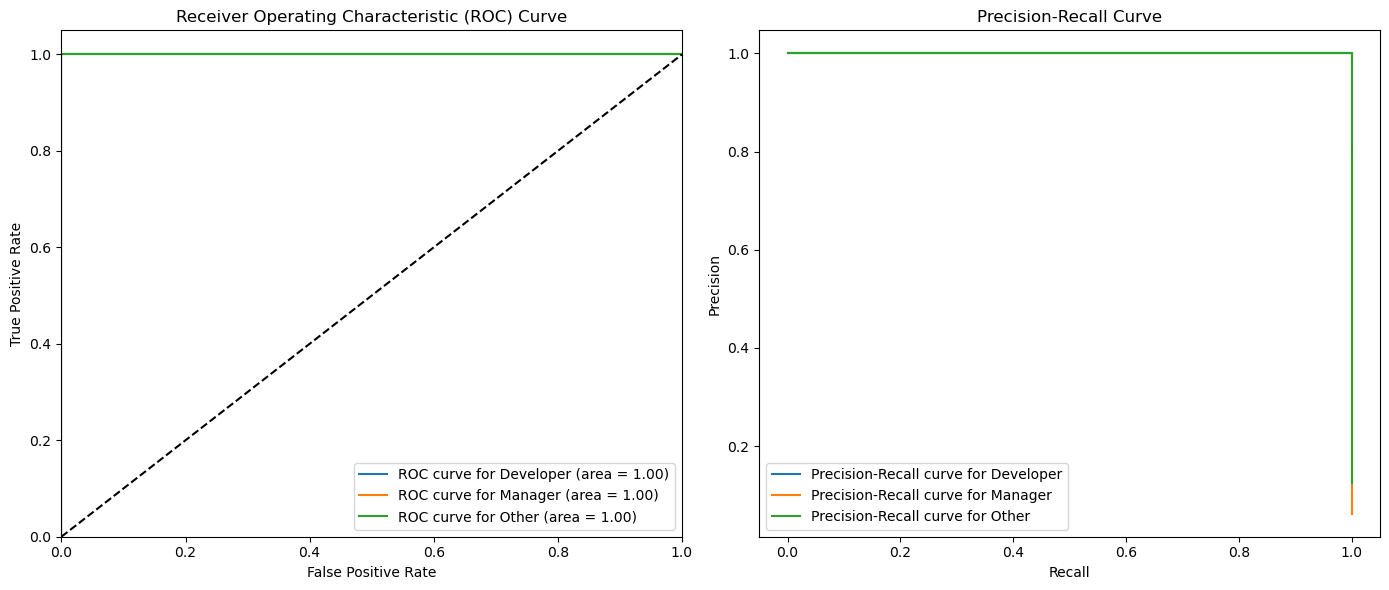

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Step 4: Get predicted probabilities for ROC and Precision-Recall Curves
y_pred =model_lg.predict_proba(X_test)

# Step 5: Create subplots for ROC Curve and Precision-Recall Curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Step 6: Plot ROC Curve (Left subplot)
for i in range(len(model_lg.classes_)):
    # Check if there are positive samples in y_test for the current class
    if np.sum(Y_test == model_lg.classes_[i]) > 0:
        fpr, tpr, _ = roc_curve(Y_test, y_pred[:, i], pos_label=model_lg.classes_[i])
        roc_auc = auc(fpr, tpr)
        ax1.plot(fpr, tpr, label=f'ROC curve for {model_lg.classes_[i]} (area = {roc_auc:.2f})')

ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
ax1.legend(loc='lower right')

# Step 7: Plot Precision-Recall Curve (Right subplot)
for i in range(len(model_lg.classes_)):
    # Check if there are positive samples in y_test for the current class
    if np.sum(Y_test == model_lg.classes_[i]) > 0:
        precision, recall, _ = precision_recall_curve(Y_test, y_pred[:, i], pos_label=model_lg.classes_[i])
        ax2.plot(recall, precision, label=f'Precision-Recall curve for {model_lg.classes_[i]}')

ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc='lower left')

# Show both plots
plt.tight_layout()
plt.show()

<h1>DecisionTreeClassifier</h1>

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score ,classification_report
from sklearn.metrics import accuracy_score


# Step 1: Train a Logistic Regression Model
model_dtc= DecisionTreeClassifier(criterion = 'entropy' , max_depth = 3)
model_dtc.fit(X_train,Y_train)

# Step 2: Make predictions
y_pred_train_dtc = model_dtc.predict(X_train)

accuracy_train_dtc = accuracy_score(Y_train, y_pred_train_dtc)
print("Accuracy on test set:", accuracy_train_dtc)

# Step 3: Evaluate the model
print(classification_report(Y_train, y_pred_train_dtc))


Accuracy on test set: 1.0
              precision    recall  f1-score   support

       Admin       1.00      1.00      1.00         7
   Developer       1.00      1.00      1.00        39
     Manager       1.00      1.00      1.00         2
       Other       1.00      1.00      1.00        15

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [39]:
# Step 2: Make predictions
y_pred_test_dtc = model_dtc.predict(X_test)
accuracy_test_dtc= accuracy_score(Y_test, y_pred_test_dtc)
print("Accuracy on test set:", accuracy_test_dtc)

# Step 3: Evaluate the model
print(classification_report(Y_test, y_pred_test_dtc))

Accuracy on test set: 1.0
              precision    recall  f1-score   support

   Developer       1.00      1.00      1.00        13
     Manager       1.00      1.00      1.00         1
       Other       1.00      1.00      1.00         2

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



[Text(0.6666666666666666, 0.875, 'x[0] <= 0.5\nentropy = 1.431\nsamples = 63\nvalue = [7, 39, 2, 15]'),
 Text(0.5, 0.625, 'x[1] <= 0.5\nentropy = 1.241\nsamples = 24\nvalue = [7, 0, 2, 15]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'x[2] <= 0.5\nentropy = 0.523\nsamples = 17\nvalue = [0, 0, 2, 15]'),
 Text(0.16666666666666666, 0.125, 'entropy = 0.0\nsamples = 15\nvalue = [0, 0, 0, 15]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0, 0, 0]'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 39\nvalue = [0, 39, 0, 0]'),
 Text(0.75, 0.75, '  False')]

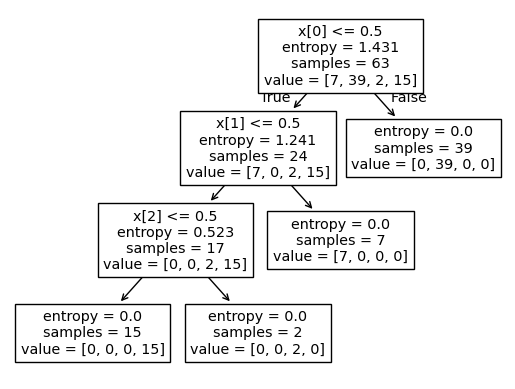

In [40]:
from sklearn import tree
tree.plot_tree(model_dtc)

<h1>Naive Baye's</h1>

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,accuracy_score

model_nb= GaussianNB()
model_nb.fit(X_train,Y_train)

# Step 2: Make predictions
y_pred_train_nb = model_nb.predict(X_train)

accuracy_train_nb= accuracy_score(Y_train, y_pred_train_nb)
print("Accuracy on test set:", accuracy_train_nb)

# Step 3: Evaluate the model
print(classification_report(Y_train, y_pred_train_nb))


Accuracy on test set: 1.0
              precision    recall  f1-score   support

       Admin       1.00      1.00      1.00         7
   Developer       1.00      1.00      1.00        39
     Manager       1.00      1.00      1.00         2
       Other       1.00      1.00      1.00        15

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [42]:
y_pred_test_nb= model_nb.predict(X_test)

accuracy_test_nb = accuracy_score(Y_test, y_pred_test_nb)
print("Accuracy on test set:", accuracy_test_nb)

# Step 3: Evaluate the model
print(classification_report(Y_test, y_pred_test_nb))


Accuracy on test set: 0.875
              precision    recall  f1-score   support

       Admin       0.00      0.00      0.00         0
   Developer       1.00      1.00      1.00        13
     Manager       1.00      1.00      1.00         1
       Other       0.00      0.00      0.00         2

    accuracy                           0.88        16
   macro avg       0.50      0.50      0.50        16
weighted avg       0.88      0.88      0.88        16



<h1>K-Nearest Neighbors:</h1>

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score

#Apply KNN algorithm
model_knn= KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train,Y_train)

# Step 2: Make predictions
y_pred_train_knn = model_knn.predict(X_train)

accuracy_train_knn = accuracy_score(Y_train, y_pred_train_knn)
print("Accuracy on test set:", accuracy_train_knn)

# Step 3: Evaluate the model
print(classification_report(Y_train, y_pred_train_knn))


Accuracy on test set: 0.9206349206349206
              precision    recall  f1-score   support

       Admin       1.00      0.57      0.73         7
   Developer       0.93      1.00      0.96        39
     Manager       0.00      0.00      0.00         2
       Other       0.88      1.00      0.94        15

    accuracy                           0.92        63
   macro avg       0.70      0.64      0.66        63
weighted avg       0.90      0.92      0.90        63



In [44]:
y_pred_test_knn = model_knn.predict(X_test)

accuracy_test_knn = accuracy_score(Y_test, y_pred_test_knn)
print("Accuracy on test set:",accuracy_test_knn)

# Step 3: Evaluate the model
print(classification_report(Y_test, y_pred_test_knn))


Accuracy on test set: 0.9375
              precision    recall  f1-score   support

   Developer       1.00      1.00      1.00        13
     Manager       0.00      0.00      0.00         1
       Other       0.67      1.00      0.80         2

    accuracy                           0.94        16
   macro avg       0.56      0.67      0.60        16
weighted avg       0.90      0.94      0.91        16



<h1>
Support Vector Machine</h1>

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
model_svc= SVC(kernel='linear', probability= True)
model_svc.fit(X_train, Y_train)

# Step 2: Make predictions
y_pred_train_svc = model_svc.predict(X_train)

accuracy_train_svc = accuracy_score(Y_train, y_pred_train_svc)
print("Accuracy on test set:", accuracy_train_svc )

# Step 3: Evaluate the model
print(classification_report(Y_train, y_pred_train_svc))



Accuracy on test set: 1.0
              precision    recall  f1-score   support

       Admin       1.00      1.00      1.00         7
   Developer       1.00      1.00      1.00        39
     Manager       1.00      1.00      1.00         2
       Other       1.00      1.00      1.00        15

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [46]:
y_pred_test_svc = model_svc.predict(X_test)

accuracy_test_svc = accuracy_score(Y_test, y_pred_test_svc)
print("Accuracy on test set:", accuracy_test_svc )

# Step 3: Evaluate the model
print(classification_report(Y_test, y_pred_test_svc))

Accuracy on test set: 1.0
              precision    recall  f1-score   support

   Developer       1.00      1.00      1.00        13
     Manager       1.00      1.00      1.00         1
       Other       1.00      1.00      1.00         2

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



<h1>RandomForestClassifier</h1>

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

# Train a classification model
model_rfc = RandomForestClassifier(random_state=42)
model_rfc.fit(X_train, Y_train)

# Make predictions
y_pred_train_rfc = model_rfc.predict(X_train)

accuracy_train_rfc = accuracy_score(Y_train, y_pred_train_rfc)
# Step 7: Print the accuracy
print("Accuracy on test set:", accuracy_train_rfc)

# Evaluate the model, using zero_division=1 to handle undefined precision
print(classification_report(Y_train, y_pred_train_rfc, zero_division=1))


Accuracy on test set: 1.0
              precision    recall  f1-score   support

       Admin       1.00      1.00      1.00         7
   Developer       1.00      1.00      1.00        39
     Manager       1.00      1.00      1.00         2
       Other       1.00      1.00      1.00        15

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [48]:
# Make predictions and evaluate again
y_pred_test_rfc = model_rfc.predict(X_test)

accuracy_test_rfc = accuracy_score(Y_test, y_pred_test_rfc)
print("Accuracy on test set:", accuracy_test_rfc)

# Step 3: Evaluate the model
print(classification_report(Y_test, y_pred_test_rfc))

Accuracy on test set: 1.0
              precision    recall  f1-score   support

   Developer       1.00      1.00      1.00        13
     Manager       1.00      1.00      1.00         1
       Other       1.00      1.00      1.00         2

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



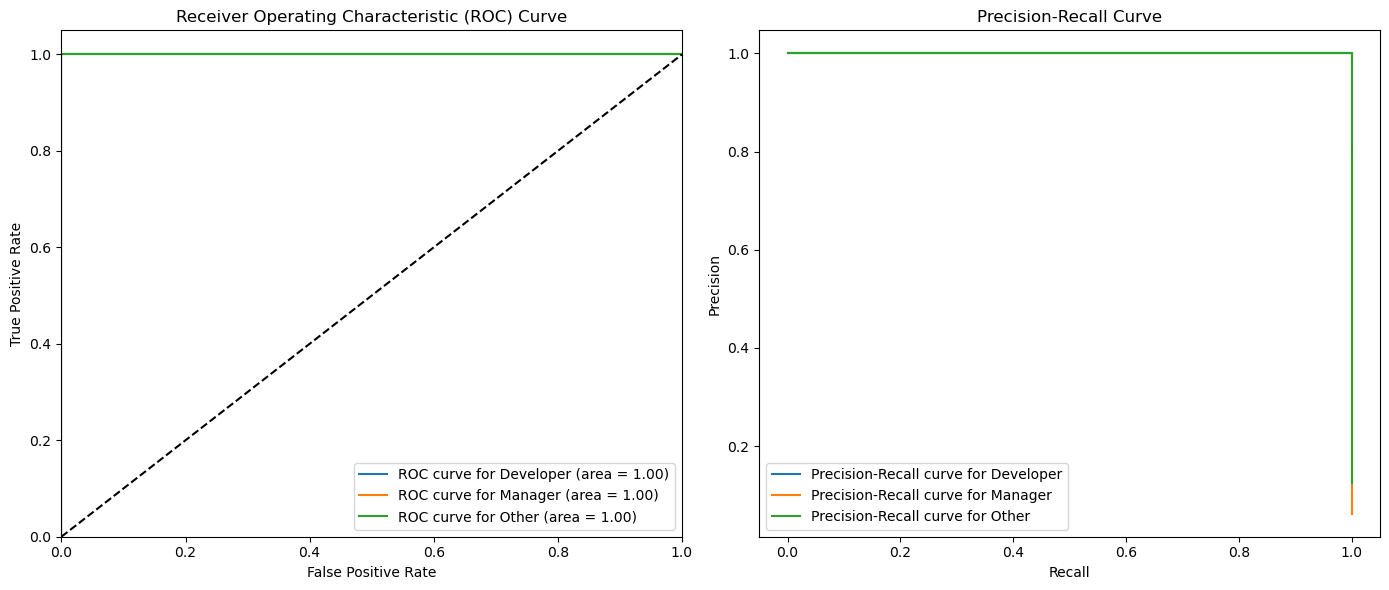

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import numpy as np

# Get predicted probabilities
y_pred_proba = model_rfc.predict_proba(X_test)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# ROC Curve (Left subplot)
for i in range(len(model_rfc.classes_)):
    # Check if there are positive samples in Y_test for the current class
    if np.sum(Y_test == model_rfc.classes_[i]) > 0:
        fpr, tpr, _ = roc_curve(Y_test, y_pred_proba[:, i], pos_label=model_rfc.classes_[i])
        roc_auc = auc(fpr, tpr)
        ax1.plot(fpr, tpr, label=f'ROC curve for {model_rfc.classes_[i]} (area = {roc_auc:.2f})')

ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
ax1.legend(loc='lower right')

# Precision-Recall Curve (Right subplot)
for i in range(len(model_rfc.classes_)):
    # Check if there are positive samples in Y_test for the current class
    if np.sum(Y_test == model_rfc.classes_[i]) > 0:
        precision, recall, _ = precision_recall_curve(Y_test, y_pred_proba[:, i], pos_label=model_rfc.classes_[i])
        ax2.plot(recall, precision, label=f'Precision-Recall curve for {model_rfc.classes_[i]}')

ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc='lower left')

# Show both plots
plt.tight_layout()
plt.show()


<h1>XGBClassifier</h1>

In [50]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_in['Label'] = label_encoder.fit_transform(df_in['Label'])
print(df_in['Label'].unique())

[1 0 3 2]


In [51]:
df_in

,File Name,Label,Cleaned_Tokens,count_developer,count_admin,count_manager,count_other
0,Peoplesoft Admin_AnubhavSingh.docx,1,anubhavkumarsinghtoworkinagloballycompetitivee...,1,12,2,1
1,Peoplesoft Admin_G Ananda Rayudu.doc,1,profilesummary7yearsofexperienceinimplementing...,2,5,2,0
2,Peoplesoft Admin_Gangareddy.doc,0,peoplesoftdatabaseadministratorgangareddyprofe...,0,13,3,1
3,Peoplesoft Admin_Murali.docx,1,muraliexperiencesummaryihave6yearsofexperience...,1,1,0,1
4,Peoplesoft Admin_Priyanka Ramadoss.doc,1,priyankaramadoss6146mountpleasantcoonoorthenil...,2,5,3,0
...,...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,0,workdayintegrationconsultantnamesrikrishnaspro...,0,1,0,0
75,Srikanth-Hexaware.docx,3,seekingsuitablepositionsinworkdayhcmastechnofu...,0,0,0,0
76,SSKumar_Hexaware.docx,2,workdayhcmfcmnamekumarssroleworkdayconsultantp...,0,0,1,1
77,Venkateswarlu B_Hexaware.doc,1,venkateswarlubworkdayconsultanthaving53yearsof...,1,0,0,2


In [52]:
from sklearn.model_selection import train_test_split
# Drop the non-numeric columns (keep only the features)
x= df_in.drop(columns=['Label', 'Cleaned_Tokens','File Name'])

# Prepare your labels
y = df_in['Label']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [53]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(x_train, y_train)

# Make predictions
y_pred_train_xg = model_xg.predict(x_train)

accuracy_train_xg = accuracy_score(y_train, y_pred_train_xg)
# Step 7: Print the accuracy
print("Accuracy on test set:",accuracy_train_xg)

# Evaluate the model, using zero_division=1 to handle undefined precision
print(classification_report(y_train, y_pred_train_xg, zero_division=1))


Accuracy on test set: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00        15

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [54]:
# Make predictions
y_pred_test_xg = model_xg.predict(x_test)

accuracy_test_xg= accuracy_score(y_test, y_pred_test_xg)
# Step 7: Print the accuracy
print("Accuracy on test set:", accuracy_test_xg)

# Evaluate the model, using zero_division=1 to handle undefined precision
print(classification_report(y_test, y_pred_test_xg, zero_division=1))

Accuracy on test set: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



<h1>LGBM Classifier</h1>

In [55]:
from lightgbm import LGBMClassifier
model_lgbm = LGBMClassifier()
model_lgbm.fit(x_train, y_train)

# Make predictions
y_pred_train_lgbm = model_lgbm.predict(x_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9
[LightGBM] [Info] Number of data points in the train set: 63, number of used features: 2
[LightGBM] [Info] Start training from score -2.197225
[LightGBM] [Info] Start training from score -0.479573
[LightGBM] [Info] Start training from score -3.449988
[LightGBM] [Info] Start training from score -1.435085
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [56]:
accuracy_train_lgbm = accuracy_score(y_train, y_pred_train_lgbm)
# Step 7: Print the accuracy
print("Accuracy on test set:", accuracy_train_lgbm)

# Evaluate the model, using zero_division=1 to handle undefined precision
print(classification_report(y_train, y_pred_train_lgbm, zero_division=1))


Accuracy on test set: 0.8571428571428571
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         7
           1       1.00      1.00      1.00        39
           2       1.00      0.00      0.00         2
           3       0.62      1.00      0.77        15

    accuracy                           0.86        63
   macro avg       0.91      0.50      0.44        63
weighted avg       0.91      0.86      0.80        63



In [57]:
# Make predictions
y_pred_test_lgbm = model_lgbm.predict(x_test)

accuracy_test_lgbm = accuracy_score(y_test, y_pred_test_lgbm)
# Step 7: Print the accuracy
print("Accuracy on test set:", accuracy_test_lgbm)

# Evaluate the model, using zero_division=1 to handle undefined precision
print(classification_report(y_test, y_pred_test_lgbm, zero_division=1))

Accuracy on test set: 0.9375
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.00      0.00         1
           3       0.67      1.00      0.80         2

    accuracy                           0.94        16
   macro avg       0.89      0.67      0.60        16
weighted avg       0.96      0.94      0.91        16



In [58]:
accuracies = {
    "Logistic Regression": (accuracy_train_lg, accuracy_test_lg),
    "Decision Tree Classifier": (accuracy_train_dtc, accuracy_test_dtc),
    "Naive Bayes": (accuracy_train_nb, accuracy_test_nb),
    "K-Nearest Neighbors": (accuracy_train_knn, accuracy_test_knn),
    "Support Vector Machine": (accuracy_train_svc, accuracy_test_svc),
    "Random Forest Classifier": (accuracy_train_rfc, accuracy_test_rfc),
    "XG Classifier": (accuracy_train_xg, accuracy_test_xg),
    "LGBM": (accuracy_train_lgbm, accuracy_test_lgbm)
}

for model, (train_acc, test_acc) in accuracies.items():
    print(f"{model}: Train Accuracy = {train_acc}, Test Accuracy = {test_acc}")


Logistic Regression: Train Accuracy = 1.0, Test Accuracy = 0.9375
Decision Tree Classifier: Train Accuracy = 1.0, Test Accuracy = 1.0
Naive Bayes: Train Accuracy = 1.0, Test Accuracy = 0.875
K-Nearest Neighbors: Train Accuracy = 0.9206349206349206, Test Accuracy = 0.9375
Support Vector Machine: Train Accuracy = 1.0, Test Accuracy = 1.0
Random Forest Classifier: Train Accuracy = 1.0, Test Accuracy = 1.0
XG Classifier: Train Accuracy = 1.0, Test Accuracy = 1.0
LGBM: Train Accuracy = 0.8571428571428571, Test Accuracy = 0.9375


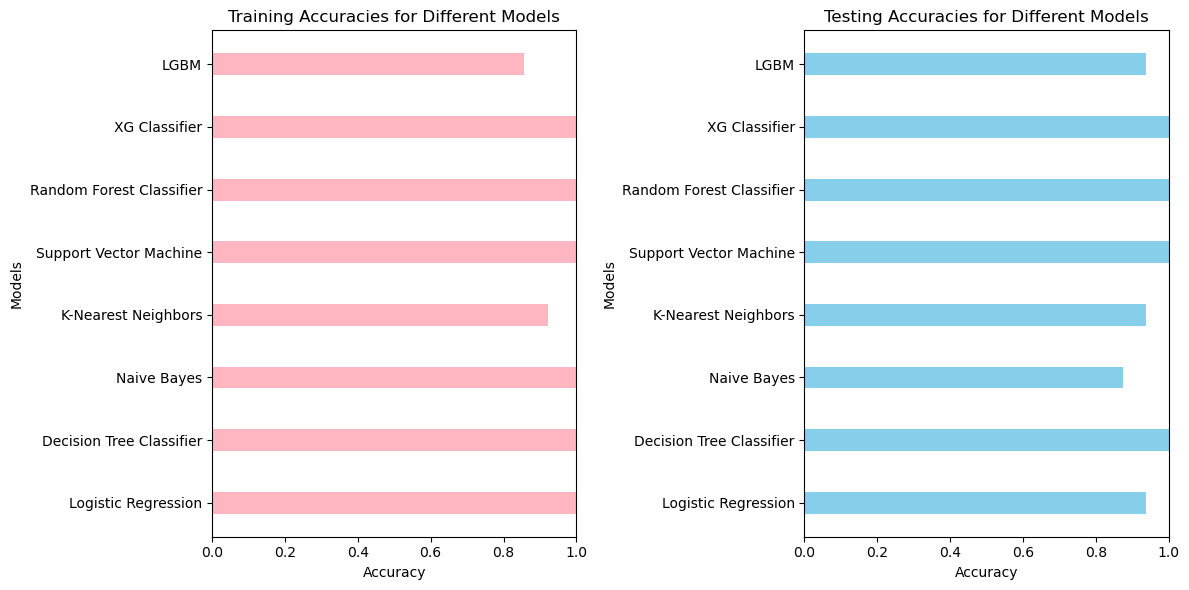

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Define models and their accuracies
models = list(accuracies.keys())
train_accuracies = [train_acc for train_acc, _ in accuracies.values()]
test_accuracies = [test_acc for _, test_acc in accuracies.values()]

# Set the bar height and positions
bar_height = 0.35
y = np.arange(len(models))

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot Train Accuracies
ax[0].barh(y, train_accuracies, height=bar_height, color='lightpink')
ax[0].set_title('Training Accuracies for Different Models')
ax[0].set_ylabel('Models')
ax[0].set_xlabel('Accuracy')
ax[0].set_yticks(y)
ax[0].set_yticklabels(models)
ax[0].set_xlim(0, 1)  # Assuming accuracy is between 0 and 1

# Plot Test Accuracies
ax[1].barh(y, test_accuracies, height=bar_height, color='skyblue')
ax[1].set_title('Testing Accuracies for Different Models')
ax[1].set_ylabel('Models')
ax[1].set_xlabel('Accuracy')
ax[1].set_yticks(y)
ax[1].set_yticklabels(models)
ax[1].set_xlim(0, 1)  # Assuming accuracy is between 0 and 1

# Show the plot
plt.tight_layout()
plt.show()


In [60]:
import pickle
# Specify the file name
file_name = "resume_classification.pkl"

# Save the model to a pickle file
with open(file_name, 'wb') as file:
    pickle.dump(model_rfc, file)

print(f"Model saved to {file_name}")


Model saved to resume_classification.pkl


In [61]:
# Save the label mapping
label_mapping = {0: 'Developer', 1: 'Admin', 2: 'Manager', 3: 'Other'}
with open('label_mapping.pkl', 'wb') as f:
    pickle.dump(label_mapping, f)

print("Model and label mapping saved.")

Model and label mapping saved.


In [62]:
# Save the vectorizer to a pickle file
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

print("TF-IDF Vectorizer saved to 'tfidf_vectorizer.pkl'")

TF-IDF Vectorizer saved to 'tfidf_vectorizer.pkl'


In [63]:
import pickle
# Specify the file name
file_name = "resume_classification_svc.pkl"

# Save the model to a pickle file
with open(file_name, 'wb') as file:
    pickle.dump(model_svc, file)

print(f"Model saved to {file_name}")


Model saved to resume_classification_svc.pkl


In [64]:
df_in.head(1)

,File Name,Label,Cleaned_Tokens,count_developer,count_admin,count_manager,count_other
0,Peoplesoft Admin_AnubhavSingh.docx,1,anubhavkumarsinghtoworkinagloballycompetitivee...,1,12,2,1


In [65]:
new_df=df_in.copy()

In [66]:
new_df['Label']=new_df['Label'].replace({0:'Developer', 1: 'Admin', 2: 'Manager', 3: 'Other'})
new_df

,File Name,Label,Cleaned_Tokens,count_developer,count_admin,count_manager,count_other
0,Peoplesoft Admin_AnubhavSingh.docx,Admin,anubhavkumarsinghtoworkinagloballycompetitivee...,1,12,2,1
1,Peoplesoft Admin_G Ananda Rayudu.doc,Admin,profilesummary7yearsofexperienceinimplementing...,2,5,2,0
2,Peoplesoft Admin_Gangareddy.doc,Developer,peoplesoftdatabaseadministratorgangareddyprofe...,0,13,3,1
3,Peoplesoft Admin_Murali.docx,Admin,muraliexperiencesummaryihave6yearsofexperience...,1,1,0,1
4,Peoplesoft Admin_Priyanka Ramadoss.doc,Admin,priyankaramadoss6146mountpleasantcoonoorthenil...,2,5,3,0
...,...,...,...,...,...,...,...
74,Sri Krishna S_Hexaware.doc,Developer,workdayintegrationconsultantnamesrikrishnaspro...,0,1,0,0
75,Srikanth-Hexaware.docx,Other,seekingsuitablepositionsinworkdayhcmastechnofu...,0,0,0,0
76,SSKumar_Hexaware.docx,Manager,workdayhcmfcmnamekumarssroleworkdayconsultantp...,0,0,1,1
77,Venkateswarlu B_Hexaware.doc,Admin,venkateswarlubworkdayconsultanthaving53yearsof...,1,0,0,2


In [67]:
import pickle
# Specify the file name
file_name = "dataset_svc.pkl"

# Save the model to a pickle file
with open(file_name, 'wb') as file:
    pickle.dump(new_df, file)

print(f"Model saved to {file_name}")


Model saved to dataset_svc.pkl
